# Titanic: Machine Learning from Disaster
## Start here! Predict survival on the Titanic and get familiar with ML basics
###  [机器学习之Kaggle泰坦尼克之灾](http://blog.csdn.net/han_xiaoyang/article/details/49797143)

先看看我们的数据，长什么样吧。在Data下我们train.csv和test.csv两个文件，分别存着官方给的训练和测试数据。

In [1]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame

data_train = pd.read_csv("./Titanic/train.csv")
data_train.tail() #pandas是常用的python数据处理包，把csv文件读入成dataframe各式，我们在ipython notebook中，看到data_train如下所示：

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


就把它想象成Excel里面的列好了。 
我们看到，总共有12列，其中Survived字段表示的是该乘客是否获救，其余都是乘客的个人信息，包括：

-    PassengerId => 乘客ID
-    Pclass => 乘客等级(1/2/3等舱位)
-    Name => 乘客姓名
-    Sex => 性别
-    Age => 年龄
-    SibSp => 堂兄弟/妹个数
-    Parch => 父母与小孩个数
-    Ticket => 船票信息
-    Fare => 票价
-    Cabin => 客舱
-    Embarked => 登船港口

逐条往下看，要看完这么多条，眼睛都有一种要瞎的赶脚。好吧，我们让dataframe自己告诉我们一些信息，如下所示：

训练数据中总共有891名乘客，但是很不幸，我们有些属性的数据不全，比如说：

- Age（年龄）属性只有714名乘客有记录
- Cabin（客舱）更是只有204名乘客是已知的

In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


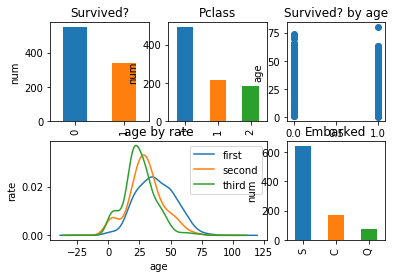

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
data_train.Survived.value_counts().plot(kind='bar')# 柱状图 
plt.title(u"Survived?") # 存活？
plt.ylabel(u"num")  

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"num")
plt.title(u"Pclass")# 乘客等级分布

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"age")                         # 设定纵坐标名称
plt.title(u"Survived? by age")


plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"age")# plots an axis lable
plt.ylabel(u"rate") 
plt.title(u"age by rate")
plt.legend((u'first', u'second',u'third'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"Embarked")
plt.ylabel(u"num")  
plt.show()
#bingo，图还是比数字好看多了。所以我们在图上可以看出来，被救的人300多点，不到半数；3等舱乘客灰常多；遇难和获救的人年龄似乎跨度都很广；3个不同的舱年龄总体趋势似乎也一致，2/3等舱乘客20岁多点的人最多，1等舱40岁左右的最多(→_→似乎符合财富和年龄的分配哈，咳咳，别理我，我瞎扯的)；登船港口人数按照S、C、Q递减，而且S远多于另外俩港口。

这个时候我们可能会有一些想法了：

- 不同舱位/乘客等级可能和财富/地位有关系，最后获救概率可能会不一样
- 年龄对获救概率也一定是有影响的，毕竟前面说了，副船长还说『小孩和女士先走』呢
- 和登船港口是不是有关系呢？也许登船港口不同，人的出身地位不同？

口说无凭，空想无益。老老实实再来统计统计，看看这些属性值的统计分布吧。